In [70]:
using LowLevelFEM

gmsh.initialize()

In [71]:
using Plots

In [72]:
gmsh.open("transient.geo")

Info    : Reading 'transient.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 60%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000603046s, CPU 0.000509s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.14458s, CPU 0.114533s)
Info    : 1314 nodes 2630 elements
Info    : Done reading 'transient.geo'


In [73]:
body = Material("body")
problem = Problem([body], type=:PlaneHeatConduction)

Problem("transient", :PlaneHeatConduction, 2, 1, Material[Material("body", :Hooke, 200000.0, 0.3, 115384.61538461536, 76923.07692307692, 166666.66666666663, 7.85e-9, 45.0, 4.2e8, 1.2e-5, 1.0e-7, 0.1, 1.0)], 1.0, 1314, LowLevelFEM.Geometry("", "", 0, 0, nothing, nothing, nothing, nothing))

In [74]:
K = heatConductionMatrix(problem)

sparse([1, 5, 220, 1310, 2, 103, 104, 1308, 3, 112  …  1046, 1179, 1246, 1313, 296, 580, 1177, 1178, 1236, 1314], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3  …  1313, 1313, 1313, 1313, 1314, 1314, 1314, 1314, 1314, 1314], [37.35571585149877, -10.442286340599505, -10.442286340599445, -16.47114317029982, 37.35571585149846, -10.44228634059713, -10.442286340597143, -16.471143170304188, 37.35571585149874, -10.442286340599228  …  -35.78589844113283, -37.012967749480495, -29.15965847953601, 164.61567411791424, -36.89540599015559, -32.319271987838476, -29.34454570926756, -35.49254660304376, -30.51803797691887, 164.56980826722423], 1314, 1314)

In [75]:
C = heatCapacityMatrix(problem, lumped=false)

sparse([1, 5, 220, 1310, 2, 103, 104, 1308, 3, 112  …  1046, 1179, 1246, 1313, 296, 580, 1177, 1178, 1236, 1314], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3  …  1313, 1313, 1313, 1313, 1314, 1314, 1314, 1314, 1314, 1314], [0.40226191875909856, 0.1005654796897749, 0.10056547968977443, 0.2011309593795495, 0.40226191875907, 0.10056547968976746, 0.10056547968976759, 0.20113095937953523, 0.40226191875909656, 0.10056547968977345  …  0.16346297449958436, 0.16968397889898174, 0.1481752626573668, 0.8130093298599171, 0.16338613721407635, 0.15578921488189268, 0.18489950714359932, 0.1774668324974628, 0.14935232826889164, 0.8308940200059225], 1314, 1314)

In [76]:
left = temperatureConstraint("left", T=0)
right = temperatureConstraint("right", T=100)
hf = heatFlux("left", qn=0)

BoundaryCondition("left", nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, 0, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing)

In [77]:
q0 = heatFluxVector(problem, [hf])

nodal ScalarField
[0.0; 0.0; … ; 0.0; 0.0;;]

In [78]:
T0 = initialTemperature(problem, "right", T=100)

nodal ScalarField
[0.0; 100.0; … ; 0.0; 0.0;;]

In [79]:
λₘᵢₙ = smallestEigenValue(K, C, support=[left, right])

0.013471652436780172

In [80]:
λₘₐₓ = largestEigenValue(K, C, support=[left, right])

389.5233904275595

In [81]:
ϑ = 0.4
Δt = 2 / ((1 - 2ϑ) * λₘₐₓ)
ϑ = 0.5

0.5

In [82]:
T = FDM(K, C, q0, T0, 1000, Δt, ϑ=ϑ, support=[left, right])

nodal ScalarField
[0.0 0.0 … 0.0 0.0; 100.0 100.0 … 100.0 100.0; … ; 0.0 2.2961160378332018e-136 … 0.010694449748256181 0.010765697228887114; 0.0 0.823134168968253 … 93.21862241337901 93.22200745841522]

In [83]:
T1 = showDoFResults(T, name="T", visible=true);

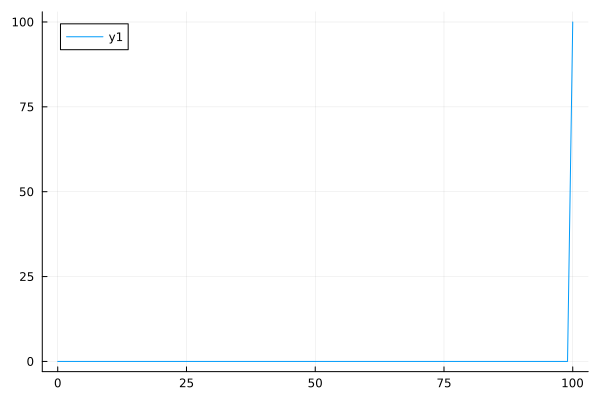

In [84]:
#p1, xy = plotOnPath("path", T1, plot=true, step=500)
p1, xy = plotOnPath("path", T1, plot=true)
plot(xy)

In [85]:
openPostProcessor()

XRequest.18: BadValue 0x0


-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


In [86]:
gmsh.finalize()